In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import norm, skew

In [2]:
train_labels=pd.read_csv(r"/home/dhusor/Downloads/train_labels.csv")
train_data=pd.read_csv(r"/home/dhusor/Downloads/train_values.csv")

In [3]:
train_dataset=train_data.merge(train_labels,on='patient_id')

In [4]:
train_dataset.head(10)

,patient_id,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,heart_disease_present
0,0z64un,1,normal,128,2,0,0,2,308,0.0,1,45,170,0,0
1,ryoo3j,2,normal,110,3,0,0,0,214,1.6,0,54,158,0,0
2,yt1s1x,1,normal,125,4,3,0,2,304,0.0,1,77,162,1,1
3,l2xjde,1,reversible_defect,152,4,0,0,0,223,0.0,1,40,181,0,1
4,oyt4ek,3,reversible_defect,178,1,0,0,2,270,4.2,1,59,145,0,0
5,ldukkw,1,normal,130,3,0,0,0,180,0.0,1,42,150,0,0
6,2gbyh9,2,reversible_defect,150,4,2,0,2,258,2.6,0,60,157,0,1
7,daa9kp,2,fixed_defect,150,4,1,0,2,276,0.6,1,57,112,1,1
8,3nwy2n,3,reversible_defect,170,4,0,0,2,326,3.4,1,59,140,1,1
9,1r508r,2,normal,120,3,0,0,0,219,1.6,0,50,158,0,0


In [5]:
train_dataset.columns

Index(['patient_id', 'slope_of_peak_exercise_st_segment', 'thal',
       'resting_blood_pressure', 'chest_pain_type', 'num_major_vessels',
       'fasting_blood_sugar_gt_120_mg_per_dl', 'resting_ekg_results',
       'serum_cholesterol_mg_per_dl', 'oldpeak_eq_st_depression', 'sex', 'age',
       'max_heart_rate_achieved', 'exercise_induced_angina',
       'heart_disease_present'],
      dtype='object')

In [6]:
train_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 180 entries, 0 to 179
Data columns (total 15 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   patient_id                            180 non-null    object 
 1   slope_of_peak_exercise_st_segment     180 non-null    int64  
 2   thal                                  180 non-null    object 
 3   resting_blood_pressure                180 non-null    int64  
 4   chest_pain_type                       180 non-null    int64  
 5   num_major_vessels                     180 non-null    int64  
 6   fasting_blood_sugar_gt_120_mg_per_dl  180 non-null    int64  
 7   resting_ekg_results                   180 non-null    int64  
 8   serum_cholesterol_mg_per_dl           180 non-null    int64  
 9   oldpeak_eq_st_depression              180 non-null    float64
 10  sex                                   180 non-null    int64  
 11  age                

In [7]:
train_dataset.isna().sum()

patient_id                              0
slope_of_peak_exercise_st_segment       0
thal                                    0
resting_blood_pressure                  0
chest_pain_type                         0
num_major_vessels                       0
fasting_blood_sugar_gt_120_mg_per_dl    0
resting_ekg_results                     0
serum_cholesterol_mg_per_dl             0
oldpeak_eq_st_depression                0
sex                                     0
age                                     0
max_heart_rate_achieved                 0
exercise_induced_angina                 0
heart_disease_present                   0
dtype: int64

In [8]:
train_dataset.shape

(180, 15)

In [9]:
train_dataset.describe()

,slope_of_peak_exercise_st_segment,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,heart_disease_present
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,1.550000,131.311111,3.155556,0.694444,0.161111,1.050000,249.211111,1.010000,0.688889,54.811111,149.483333,0.316667,0.444444
std,0.618838,17.010443,0.938454,0.969347,0.368659,0.998742,52.717969,1.121357,0.464239,9.334737,22.063513,0.466474,0.498290
min,1.000000,94.000000,1.000000,0.000000,0.000000,0.000000,126.000000,0.000000,0.000000,29.000000,96.000000,0.000000,0.000000
25%,1.000000,120.000000,3.000000,0.000000,0.000000,0.000000,213.750000,0.000000,0.000000,48.000000,132.000000,0.000000,0.000000
50%,1.000000,130.000000,3.000000,0.000000,0.000000,2.000000,245.500000,0.800000,1.000000,55.000000,152.000000,0.000000,0.000000
75%,2.000000,140.000000,4.000000,1.000000,0.000000,2.000000,281.250000,1.600000,1.000000,62.000000,166.250000,1.000000,1.000000
max,3.000000,180.000000,4.000000,3.000000,1.000000,2.000000,564.000000,6.200000,1.000000,77.000000,202.000000,1.000000,1.000000


In [10]:
cor_mat=train_dataset[:].corr()

cor_with_target=cor_mat.sort_values(['heart_disease_present'])

cor_with_target.heart_disease_present

max_heart_rate_achieved                -0.375352
fasting_blood_sugar_gt_120_mg_per_dl    0.003379
resting_blood_pressure                  0.078506
serum_cholesterol_mg_per_dl             0.079775
age                                     0.138255
resting_ekg_results                     0.145933
sex                                     0.335421
slope_of_peak_exercise_st_segment       0.344224
oldpeak_eq_st_depression                0.382930
chest_pain_type                         0.412829
num_major_vessels                       0.421519
exercise_induced_angina                 0.448647
heart_disease_present                   1.000000
Name: heart_disease_present, dtype: float64

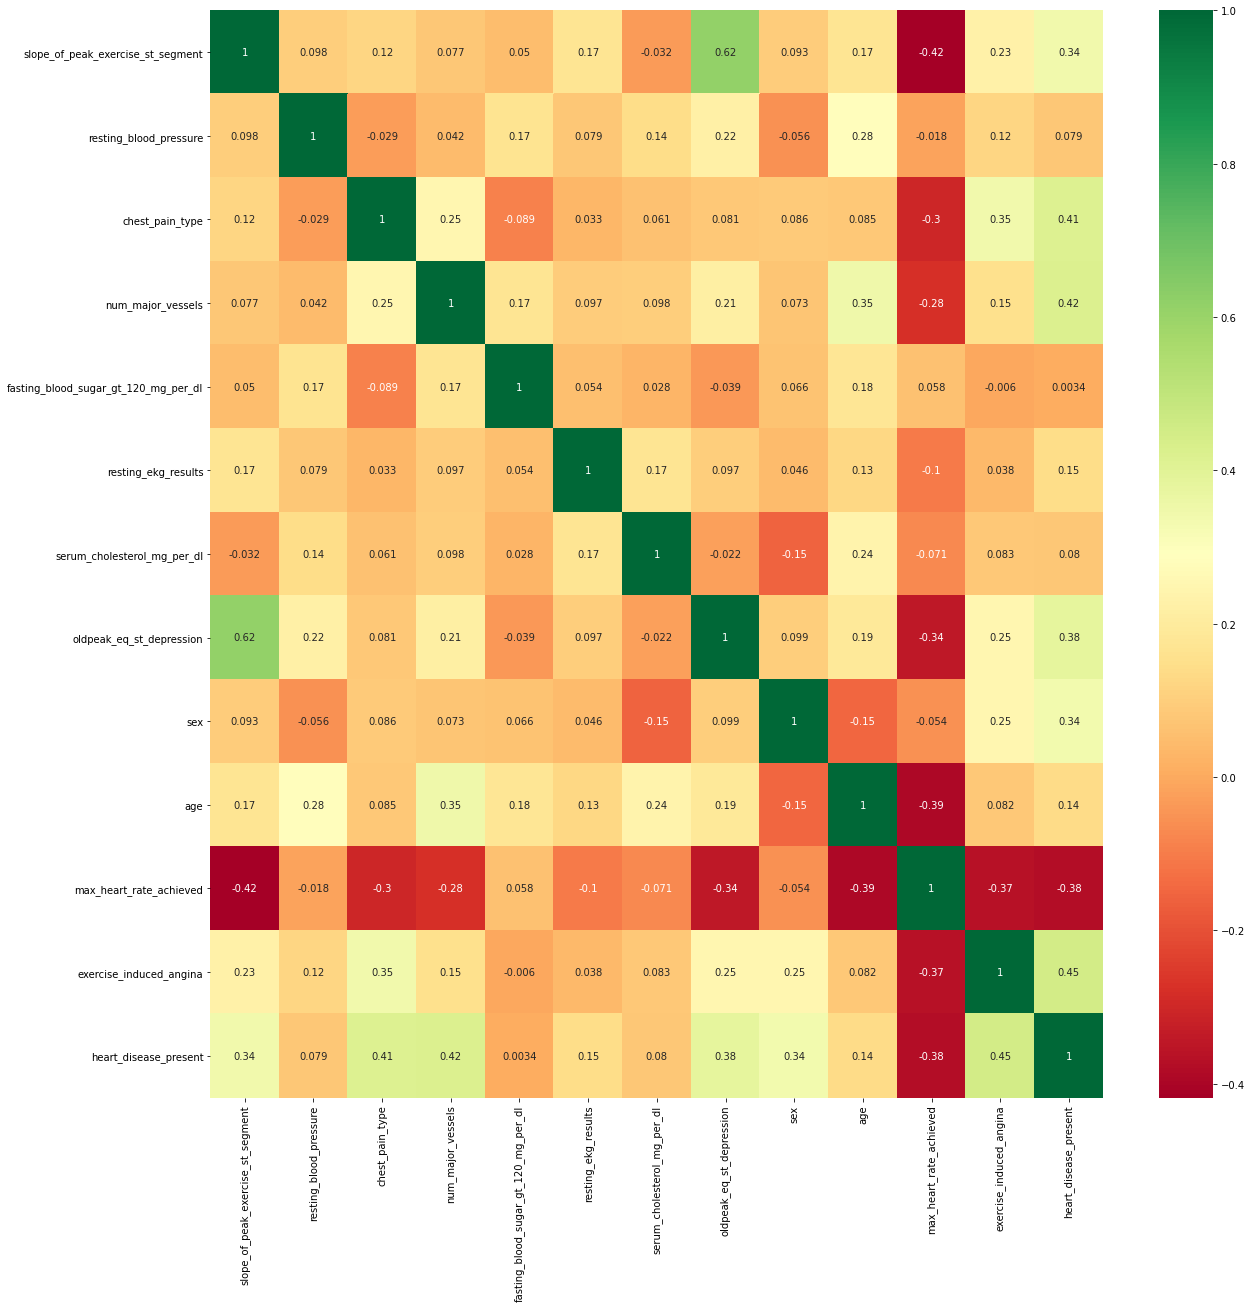

In [11]:
cor_features = cor_mat.index

plt.figure(figsize=(20,20))

heatmap=sns.heatmap(train_dataset[cor_features].corr(),annot=True,cmap="RdYlGn")
 
#slope_of_peak_exercise_st_segment and oldpeak_eq_st_depression are highly correlated each other. so we can drop one to remove redundancy.  

# Univariate Analysis

In [12]:
num_features=train_dataset.select_dtypes(include=[np.number])
cat_features=train_dataset.select_dtypes(include=[np.object])

In [13]:
def plot_num(num_features):
    fig,axes=plt.subplots(1,2)
    sns.boxplot(data=train_dataset,x=num_features,ax=axes[0])
    sns.distplot(a=train_dataset[num_features],ax=axes[1],color='#ff4125')
    fig.set_size_inches(15,5)

In [14]:
def plot_cat(cat_features):
    plt.figure(figsize=(15,5))
    sns.countplot(data=train_dataset,x=cat_features)
    ax=sns.countplot(data=train_dataset,x=cat_features)

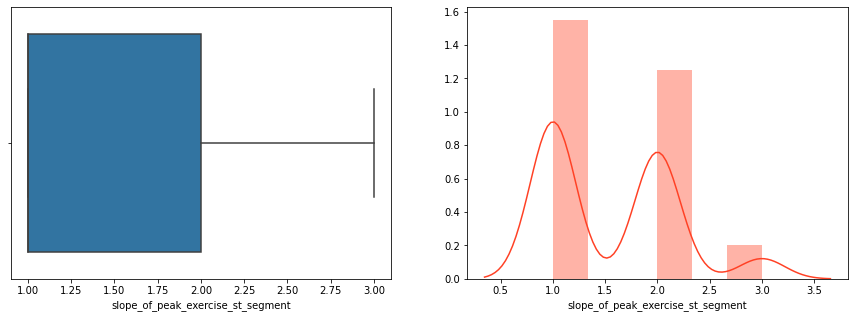

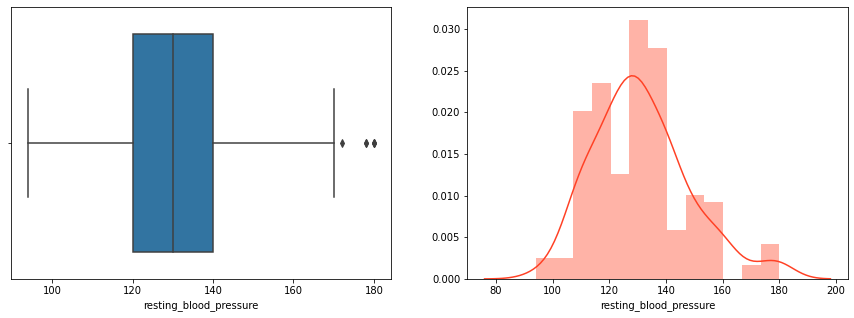

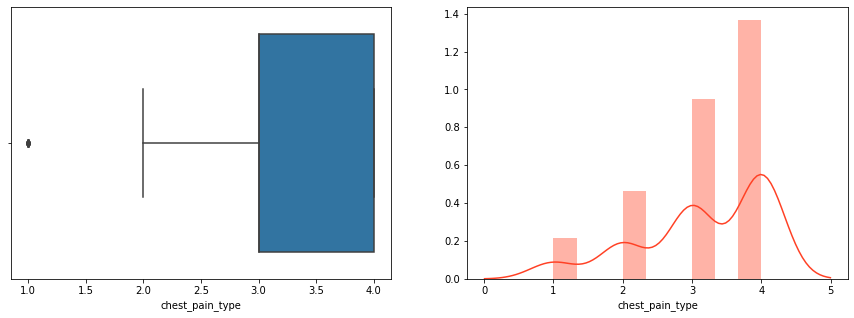

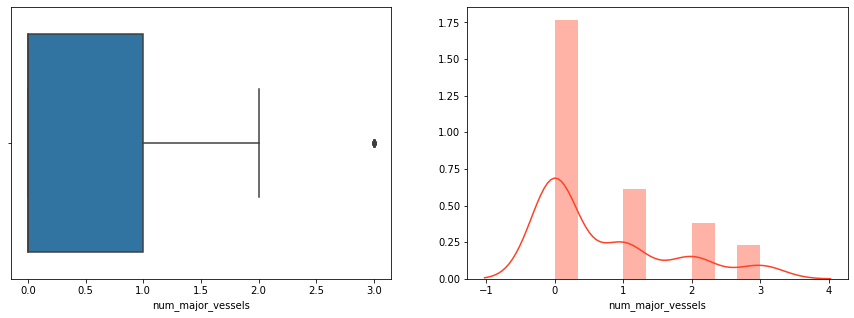

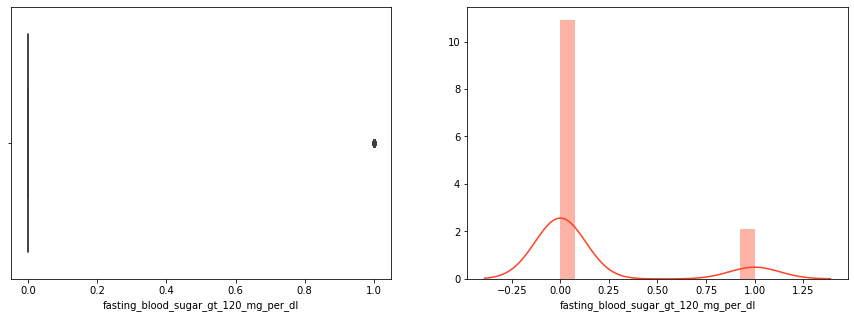

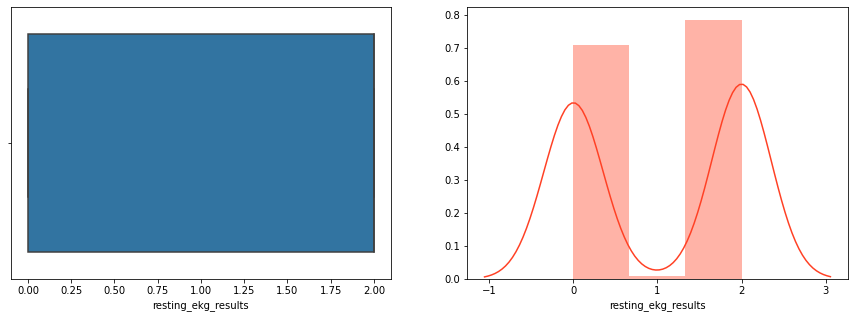

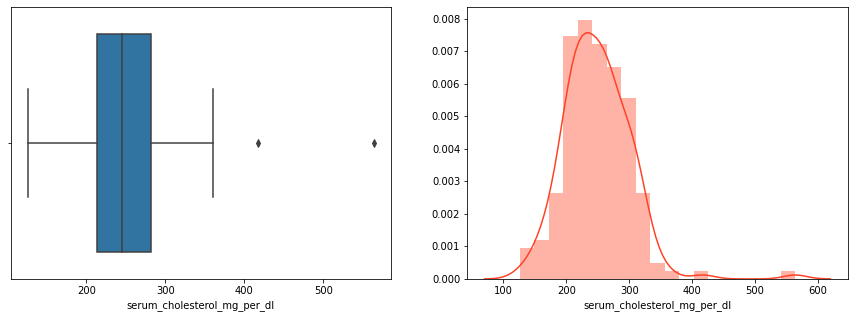

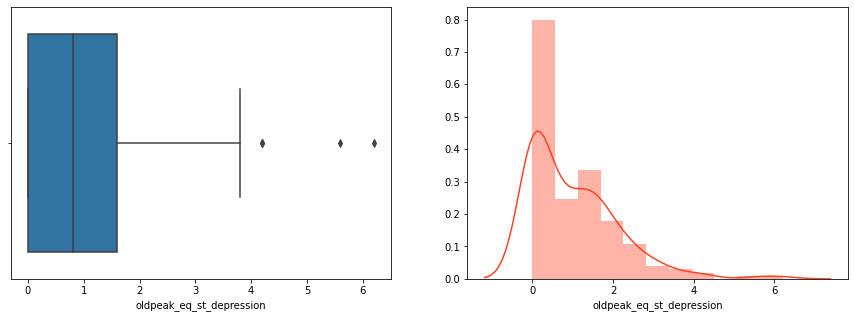

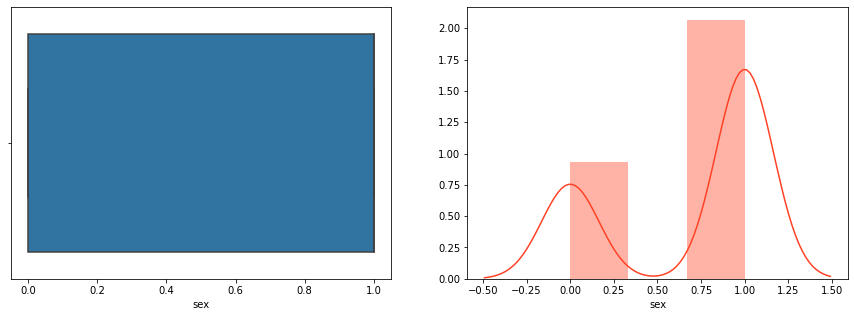

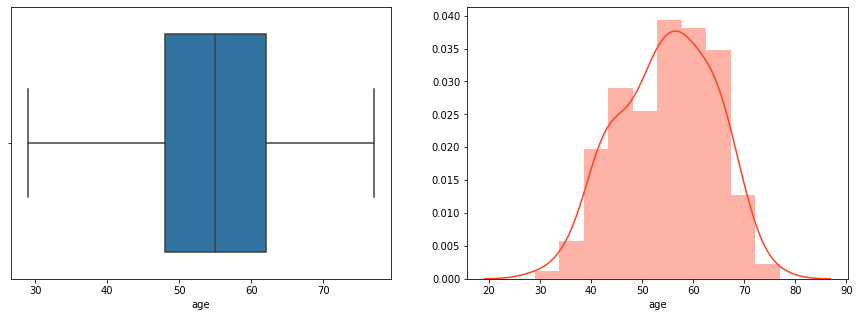

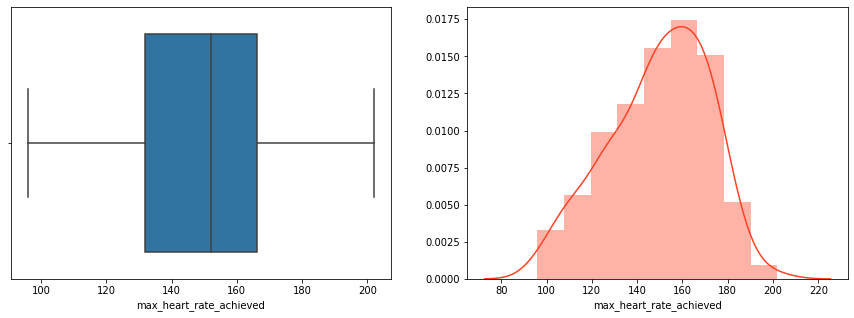

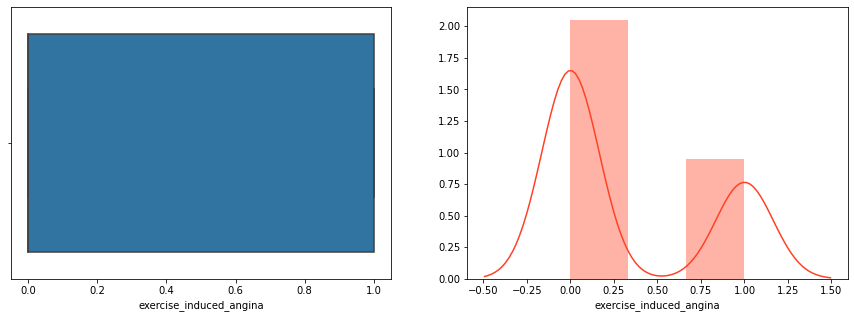

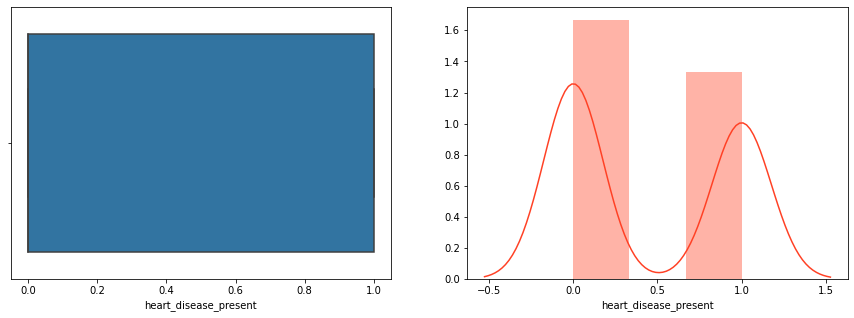

In [15]:
for col in num_features.columns:
    plot_num(col)
    

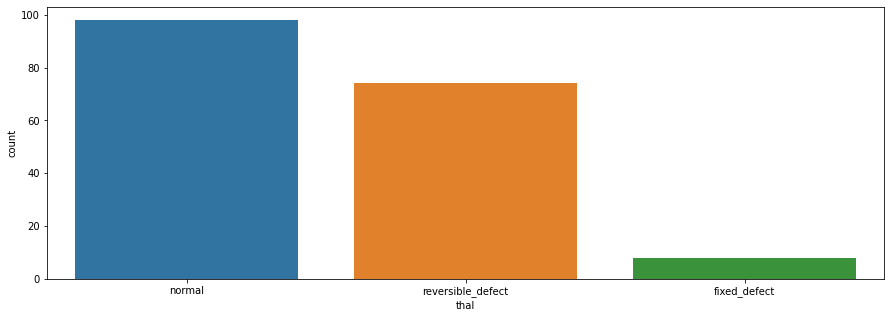

In [16]:
plot_cat('thal')

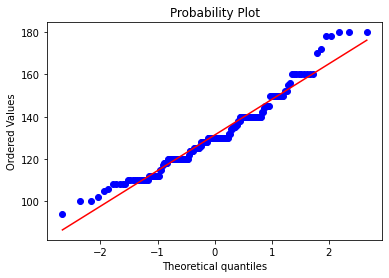

In [19]:
fig = plt.figure()
res = stats.probplot(train_dataset['resting_blood_pressure'], plot=plt)
plt.show()


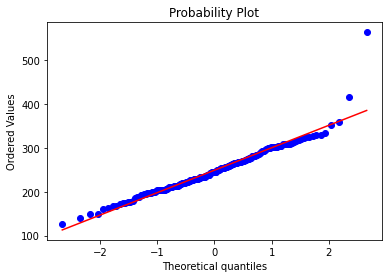

In [20]:
fig = plt.figure()
res = stats.probplot(train_dataset['serum_cholesterol_mg_per_dl'], plot=plt)
plt.show()


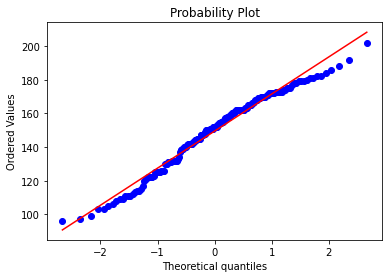

In [22]:
fig = plt.figure()
res = stats.probplot(train_dataset['max_heart_rate_achieved'], plot=plt)
plt.show()


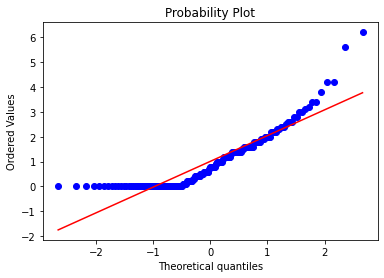

In [23]:
fig = plt.figure()
res = stats.probplot(train_dataset['oldpeak_eq_st_depression'], plot=plt)
plt.show()


In [24]:
# we can see some of the features are skewed. so Log Transform the features.